: Sentiment Analysis for Facebook Comments

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load text data from files
with open('/content/drive/My Drive/facebook comments/fb_data.txt', 'r') as file:
    texts = file.readlines()
texts = [text.strip() for text in texts if text.strip()]  # Remove empty lines

with open('/content/drive/My Drive/facebook comments/fb_label.txt', 'r') as file:
    labels = file.readlines()
labels = [label.strip() for label in labels if label.strip()]

# Ensure the number of samples is consistent
min_samples = min(len(texts), len(labels))
texts = texts[:min_samples]
labels = labels[:min_samples]

Mounted at /content/drive


In [ ]:
def preprocess_text(text):
    # Implement text preprocessing steps here
    # Example: remove punctuation, convert to lowercase, remove stopwords, etc.
    return processed_text


In [ ]:
# Convert single-character labels to numerical values
label_mapping = {'O': 2, 'P': 1, 'N': 0}
labels = [label_mapping[label] for label in labels]

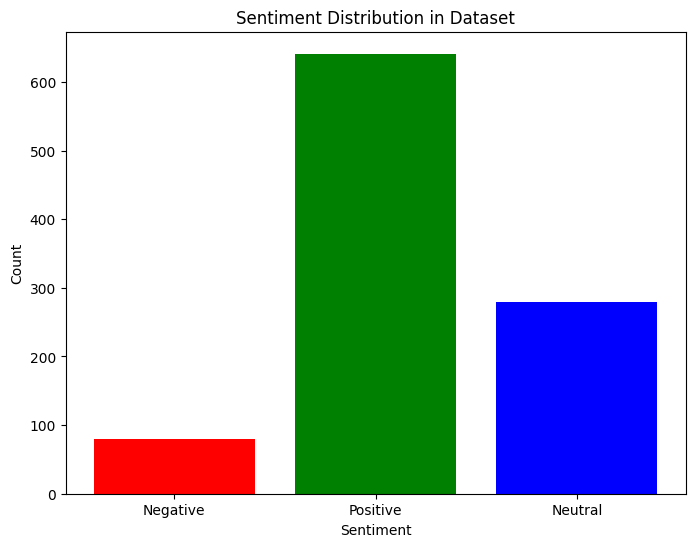

In [ ]:
sentiment_counts = pd.Series(labels).value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution in Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(sentiment_counts.index, ['Positive', 'Neutral', 'Negative'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')


In [ ]:
# Define CNN model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=max_sequence_length))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                        

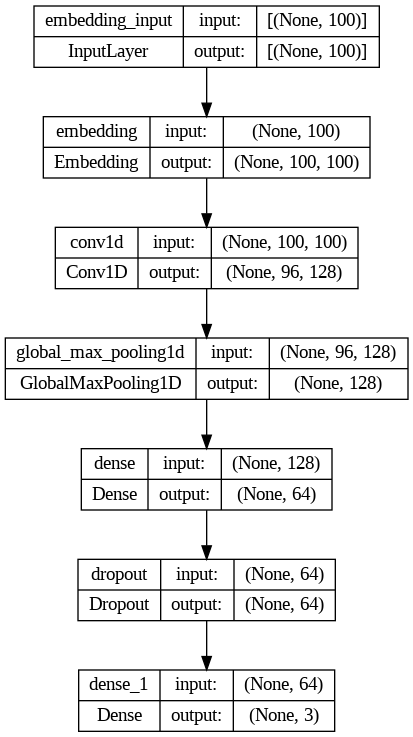

In [ ]:
# Visualize model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_pad, y_train, test_size=0.2, random_state=42)

In [ ]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
import numpy as np

# Convert y_train and y_val to numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/20
20/20 [==============================] - 2s 59ms/step - loss: 0.8944 - accuracy: 0.6594 - val_loss: 1.0660 - val_accuracy: 0.5500
Epoch 2/20
20/20 [==============================] - 2s 100ms/step - loss: 0.7944 - accuracy: 0.6656 - val_loss: 1.0313 - val_accuracy: 0.5500
Epoch 3/20
20/20 [==============================] - 3s 140ms/step - loss: 0.7911 - accuracy: 0.6687 - val_loss: 1.0473 - val_accuracy: 0.5500
Epoch 4/20
20/20 [==============================] - 2s 82ms/step - loss: 0.7301 - accuracy: 0.6734 - val_loss: 1.0326 - val_accuracy: 0.5500
Epoch 5/20
20/20 [==============================] - 1s 49ms/step - loss: 0.6617 - accuracy: 0.7125 - val_loss: 1.0468 - val_accuracy: 0.5562


In [ ]:
# Evaluate the model
import numpy as np

# Convert y_test to a numpy array
y_test = np.array(y_test)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


7/7 [==============================] - 0s 10ms/step - loss: 0.8208 - accuracy: 0.6250
Test Loss: 0.8207763433456421
Test Accuracy: 0.625


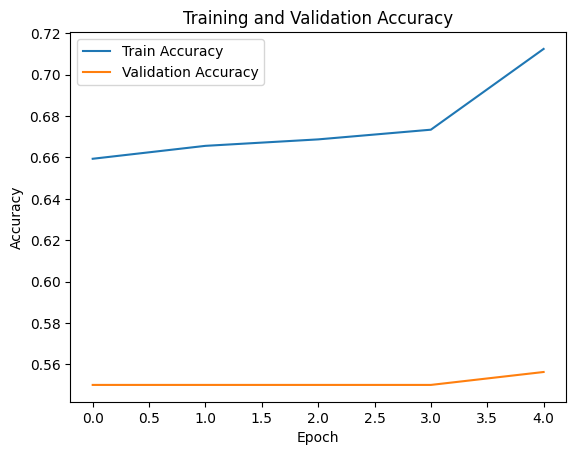

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Save the model to your local computer
model.save('sentiment_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 91ms/step
Predicted Sentiment: Neutral
Post Text: No message found in response data.
Sentiment: [[0.1096628  0.56727356 0.32306367]]


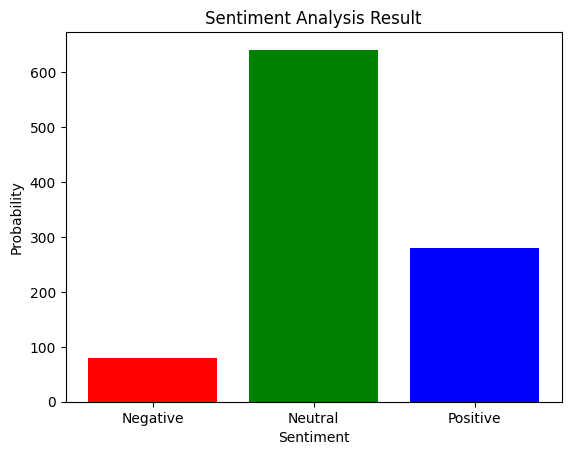

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to fetch Facebook posts using Graph API
def fetch_facebook_posts(access_token, post_id):
    url = f"https://graph.facebook.com/{post_id}?fields=message&access_token={access_token}"
    response = requests.get(url)
    data = response.json()
    if 'message' in data:
        return data['message']
    else:
        return "No message found in response data."

# Function to perform sentiment analysis on a single post
def analyze_sentiment(post_text, model, tokenizer, max_sequence_length):
    # Preprocess text
    preprocessed_text = preprocess_text(post_text)
    # Tokenize and pad sequence
    sequence = tokenizer.texts_to_sequences([preprocessed_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length, padding='post')
    # Perform sentiment analysis
    sentiment = model.predict(padded_sequence)
    return sentiment

# Function to preprocess text (similar to what you did with training data)
def preprocess_text(text):
    # Implement your preprocessing steps here
    return text

# Access Token and Post ID
access_token = 'EAAbsGeqppb0BO6nXX2xcb7a21sfyQilGS3AeZCbCOWyFdHIib8ISTk7or8ZARq465YGo0DhgG6NIme2OQa0phMyZCRxWczjqMSvOpedXyqeTvIWQPHwoJ0p1ENfcSX7Jn93uWArbm1YPaeNrl8TqetWzzM2FMroPOHepmoWgArqCS9uPUuLswgfytbVrmPmv72QOh7PIPxY3F9iQhpYh7oG1Om8ekkPpRf3ALqjwVykAyrjQSmXleaD9UntywZDZD'
post_id = '383564787779527'

# Load pre-trained model and tokenizer
model = load_model('/content/drive/My Drive/sentiment_model.h5')
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
max_sequence_length = 100

# Fetch Facebook post
post_text = fetch_facebook_posts(access_token, post_id)

# Perform Sentiment Analysis
sentiment = analyze_sentiment(post_text, model, tokenizer, max_sequence_length)

# Thresholds for classifying sentiments
positive_threshold = 0.5
negative_threshold = 0.5

if sentiment[0][0] > positive_threshold:
    predicted_sentiment = "Positive"
elif sentiment[0][2] > negative_threshold:
    predicted_sentiment = "Negative"
else:
    predicted_sentiment = "Neutral"

# Display Results
print("Predicted Sentiment:", predicted_sentiment)
print("Post Text:", post_text)
print("Sentiment:", sentiment)

# Plot the sentiment probabilities
classes = ['Negative', 'Neutral', 'Positive']
plt.bar(classes, sentiment[0])
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis Result')
plt.xlabel('Sentiment')
plt.ylabel('Probability')
plt.show()
